In [1]:
import csv
from pymatgen.core import Composition
from pymatgen.util.plotting import periodic_table_heatmap
import matplotlib.pyplot as plt

In [2]:
def get_pairs(formula):
    comp = Composition(formula)
    comp_d = comp.get_el_amt_dict()
    comp_l = list(comp_d.keys())   
    comp_l.sort()   # Sorting will make the order of elements in which they occur in pairs unique

    pairs = []
    l = len(comp_l)
    for i in range(l):
        if i == (l-1): break
        for j in range(i, l):
            if j == (l-1): break
            pairs.append((comp_l[i], comp_l[j+1]))
    return pairs

In [3]:
# For getting Laplace Smoothed Counts for all elements
trivial_count = {}
topological_count = {}

# For getting Laplace Smoothed Counts for pairs of elements present in the dataset
topological_pairs_count = {}
trivial_pairs_count = {}

with open('processed_data.csv', 'r', newline='') as f:
    r = csv.reader(f)
    for i in r:
        comp = Composition(i[1]).get_el_amt_dict()
        for j in comp.keys():
            if j not in topological_count: topological_count[j] = 1
            if j not in trivial_count: trivial_count[j] = 1
            if i[2] == '1': topological_count[j] += 1
            else: trivial_count[j] += 1

        for j in get_pairs(i[1]):
            if j not in topological_pairs_count: topological_pairs_count[j] = 1
            if j not in trivial_pairs_count: trivial_pairs_count[j] = 1
            if i[2] == '1': topological_pairs_count[j] += 1
            else: trivial_pairs_count[j] += 1

Text(0, 0.5, 'No. of Trivial Materials')

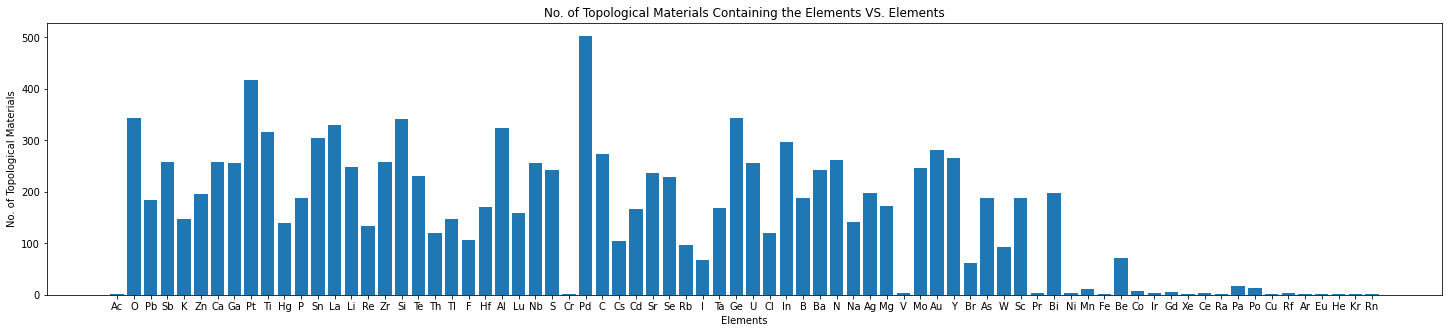

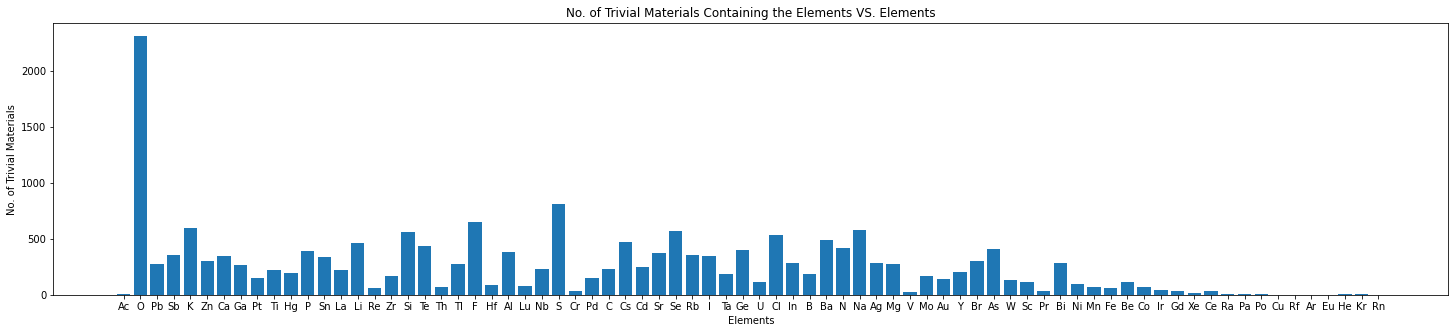

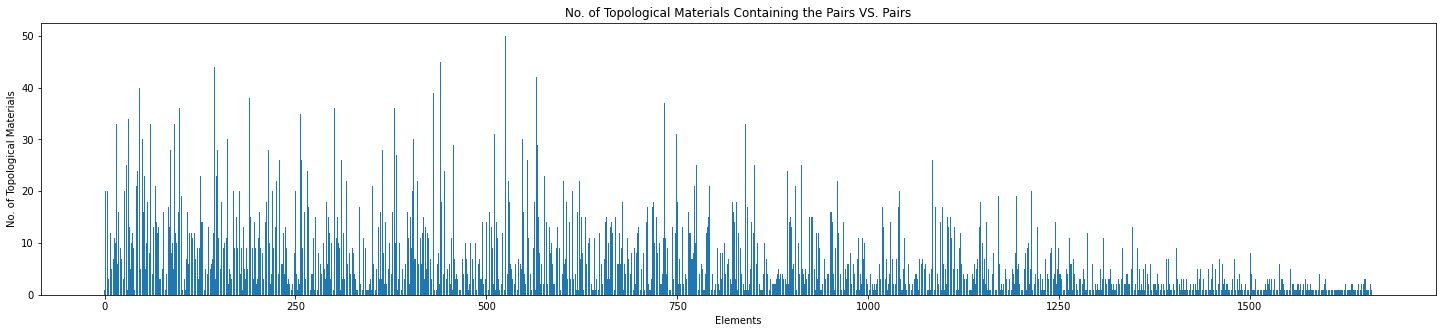

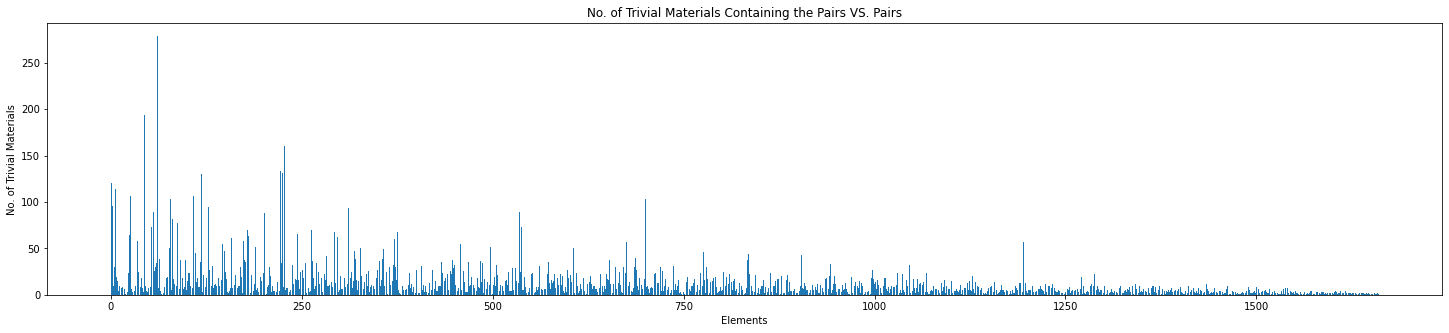

In [4]:
# Plotting bar plots of counts
elements = list(topological_count.keys())
ele_topological_values = [topological_count[i] for i in elements]
ele_trivial_values = [trivial_count[i] for i in elements]

pairs = list(topological_pairs_count.keys())
pairs_topological_values = [topological_pairs_count[i] for i in pairs]
pairs_trivial_values = [trivial_pairs_count[i] for i in pairs]

plt.figure(figsize=(25, 5))
plt.bar(elements, ele_topological_values)
plt.title('No. of Topological Materials Containing the Elements VS. Elements')
plt.xlabel('Elements')
plt.ylabel('No. of Topological Materials')

plt.figure(figsize=(25, 5))
plt.bar(elements, ele_trivial_values)
plt.title('No. of Trivial Materials Containing the Elements VS. Elements')
plt.xlabel('Elements')
plt.ylabel('No. of Trivial Materials')

for_plotting_pairs = [i for i in range(len(pairs))]
plt.figure(figsize=(25, 5))
plt.bar(for_plotting_pairs, pairs_topological_values)
plt.title('No. of Topological Materials Containing the Pairs VS. Pairs')
plt.xlabel('Elements')
plt.ylabel('No. of Topological Materials')

plt.figure(figsize=(25, 5))
plt.bar(for_plotting_pairs, pairs_trivial_values)
plt.title('No. of Trivial Materials Containing the Pairs VS. Pairs')
plt.xlabel('Elements')
plt.ylabel('No. of Trivial Materials')

In [5]:
print('Total number of elements present in dataset =', len(elements))
print('Total number of pairs of elements present in dataset =', len(pairs))

Total number of elements present in dataset = 76
Total number of pairs of elements present in dataset = 1661


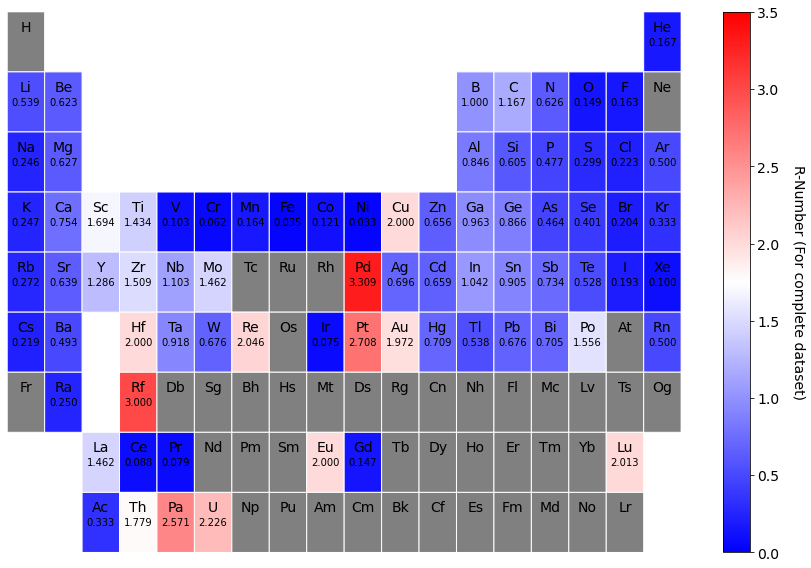

<Axes: >

In [22]:
# Generating the ratio of probabilities for each element and pair
r_number_for_element = {}
for i in elements:
    r_number_for_element[i] = topological_count[i] / trivial_count[i]

r_number_for_pair = {}
for i in pairs:
    r_number_for_pair[i] = topological_pairs_count[i] / trivial_pairs_count[i]

# Writing R-Number values
with open('results\\r_number_values\\complete_dataset_values\\element_r_number_complete_dataset.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for i in r_number_for_element.keys():
        w.writerow([i, r_number_for_element[i]])
with open('results\\r_number_values\\complete_dataset_values\\pair_r_number_complete_dataset.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for i in r_number_for_pair.keys():
        w.writerow([i, r_number_for_pair[i]])

# Generating heatmaps
l = int(min(r_number_for_element.values())) # Lower value for Heatmap
h = int(max(r_number_for_element.values()))    # Higher value for Heatmap
if (max(r_number_for_element.values()) - int(max(r_number_for_element.values()))) < 0.5: h += 0.5
else: h += 1

periodic_table_heatmap(r_number_for_element, cbar_label="R-Number (For complete dataset)", show_plot=True, cmap="bwr", cmap_range=(l,h), value_format='%.3f', pymatviz=False)

In [23]:
# Making final dataset to run ML algorithm
with open('complete_ml_dataset.csv', 'w', newline='') as fw:
    w = csv.writer(fw)
    with open('processed_data.csv', 'r') as fr:
        r = csv.reader(fr)
        for i in r:
            calculated_from_ele = 0
            calculated_from_reciprocal = 0
            calculated_from_pair = 0
            calculated_from_pair_reciprocal = 0
            comp = Composition(i[1]).fractional_composition.get_el_amt_dict()

            for j in comp.keys():
                calculated_from_ele += r_number_for_element[j] * comp[j]
                calculated_from_reciprocal += (1 / r_number_for_element[j]) * comp[j]
            
            for j in get_pairs(i[1]):
                frac_composition_of_pair = 0
                for _ in j: frac_composition_of_pair += comp[_]
                calculated_from_pair += r_number_for_pair[j] * frac_composition_of_pair
                calculated_from_pair_reciprocal += (1 / r_number_for_pair[j]) * frac_composition_of_pair
            
            w.writerow([i[0], i[1], calculated_from_ele, calculated_from_pair, calculated_from_reciprocal, calculated_from_pair_reciprocal, i[2]])

Text(0, 0.5, 'No. of Trivial Materials')

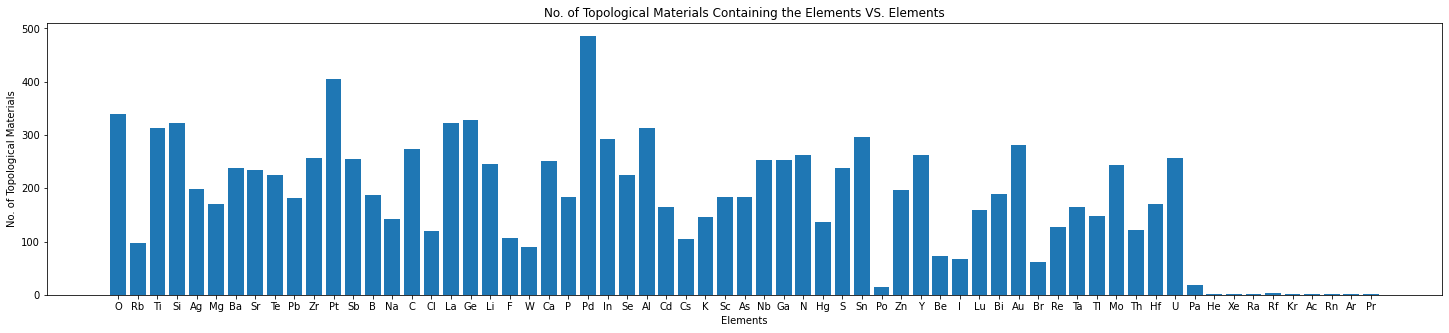

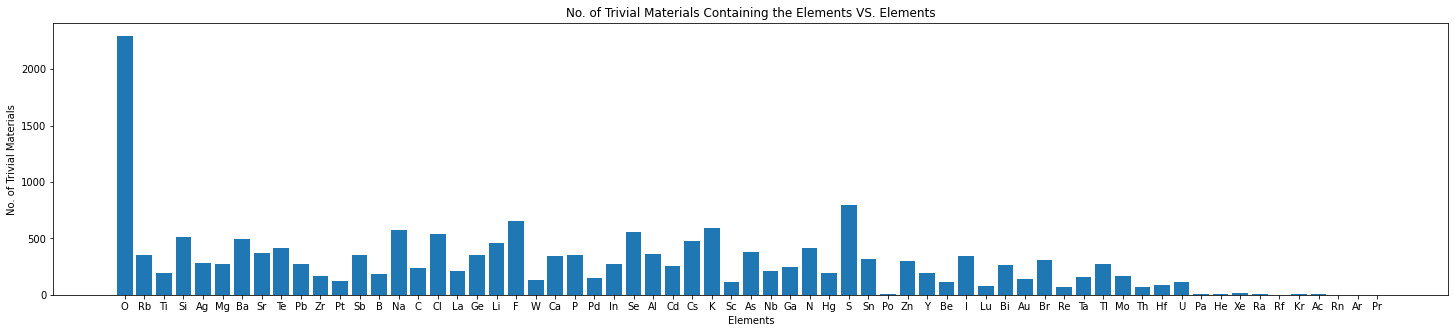

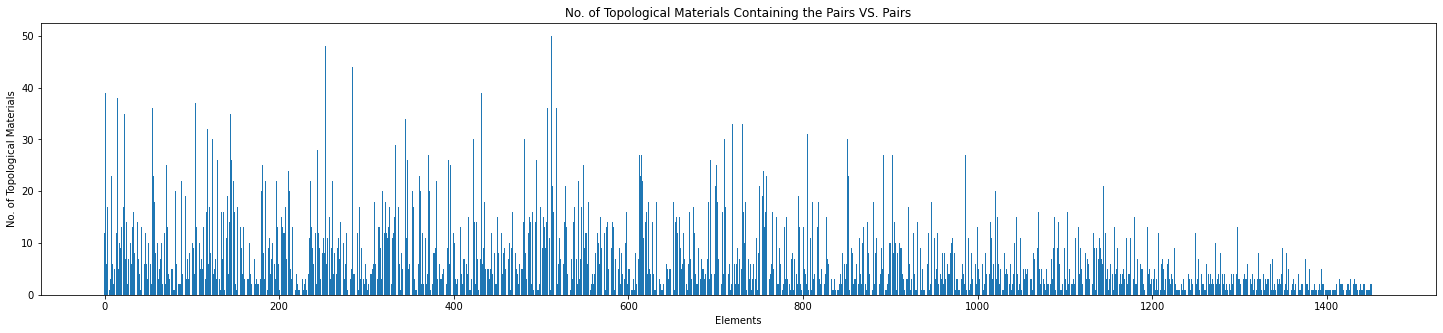

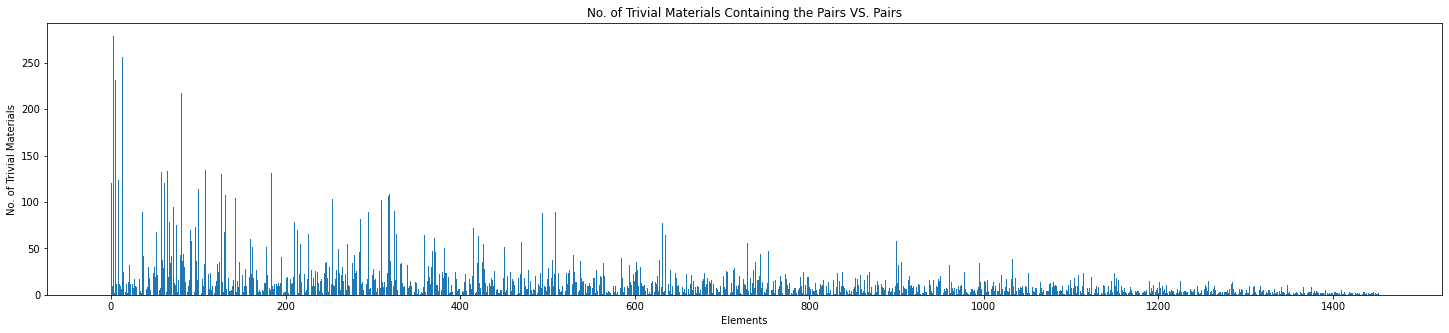

In [24]:
# Making ML dataset for only Topogivity
# For getting Laplace Smoothed Counts for all elements
trivial_count = {}
topological_count = {}

# For getting Laplace Smoothed Counts for pairs of elements present in the dataset
topological_pairs_count = {}
trivial_pairs_count = {}

with open('topogivity_processed_data.csv', 'r', newline='') as f:
    r = csv.reader(f)
    for i in r:
        comp = Composition(i[1]).get_el_amt_dict()
        for j in comp.keys():
            if j not in topological_count: topological_count[j] = 1
            if j not in trivial_count: trivial_count[j] = 1
            if i[2] == '1': topological_count[j] += 1
            else: trivial_count[j] += 1

        for j in get_pairs(i[1]):
            if j not in topological_pairs_count: topological_pairs_count[j] = 1
            if j not in trivial_pairs_count: trivial_pairs_count[j] = 1
            if i[2] == '1': topological_pairs_count[j] += 1
            else: trivial_pairs_count[j] += 1

# Plotting bar plots of counts
elements = list(topological_count.keys())
ele_topological_values = [topological_count[i] for i in elements]
ele_trivial_values = [trivial_count[i] for i in elements]

pairs = list(topological_pairs_count.keys())
pairs_topological_values = [topological_pairs_count[i] for i in pairs]
pairs_trivial_values = [trivial_pairs_count[i] for i in pairs]

plt.figure(figsize=(25, 5))
plt.bar(elements, ele_topological_values)
plt.title('No. of Topological Materials Containing the Elements VS. Elements')
plt.xlabel('Elements')
plt.ylabel('No. of Topological Materials')

plt.figure(figsize=(25, 5))
plt.bar(elements, ele_trivial_values)
plt.title('No. of Trivial Materials Containing the Elements VS. Elements')
plt.xlabel('Elements')
plt.ylabel('No. of Trivial Materials')

for_plotting_pairs = [i for i in range(len(pairs))]
plt.figure(figsize=(25, 5))
plt.bar(for_plotting_pairs, pairs_topological_values)
plt.title('No. of Topological Materials Containing the Pairs VS. Pairs')
plt.xlabel('Elements')
plt.ylabel('No. of Topological Materials')

plt.figure(figsize=(25, 5))
plt.bar(for_plotting_pairs, pairs_trivial_values)
plt.title('No. of Trivial Materials Containing the Pairs VS. Pairs')
plt.xlabel('Elements')
plt.ylabel('No. of Trivial Materials')

In [25]:
print('Total number of elements present in dataset =', len(elements))
print('Total number of pairs of elements present in dataset =', len(pairs))

Total number of elements present in dataset = 65
Total number of pairs of elements present in dataset = 1453


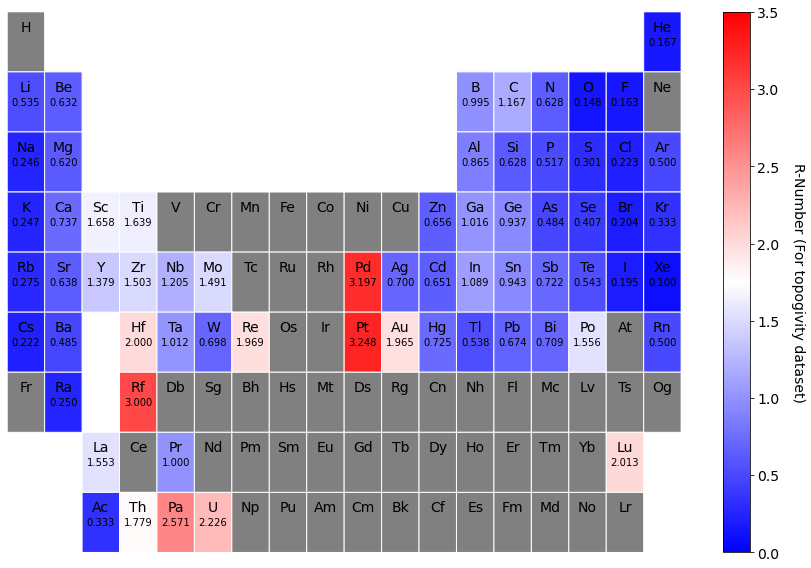

In [26]:
# Generating the ratio of probabilities for each element and pair
r_number_for_element = {}
for i in elements:
    r_number_for_element[i] = topological_count[i] / trivial_count[i]

r_number_for_pair = {}
for i in pairs:
    r_number_for_pair[i] = topological_pairs_count[i] / trivial_pairs_count[i]

# Writing R-Number values
with open('results\\r_number_values\\topogivity_dataset_values\\element_r_number_topogivity_dataset.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for i in r_number_for_element.keys():
        w.writerow([i, r_number_for_element[i]])
with open('results\\r_number_values\\topogivity_dataset_values\\pair_r_number_topogivity_dataset.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for i in r_number_for_pair.keys():
        w.writerow([i, r_number_for_pair[i]])

# Generating heatmaps
l = int(min(r_number_for_element.values())) # Lower value for Heatmap
h = int(max(r_number_for_element.values()))    # Higher value for Heatmap
if (max(r_number_for_element.values()) - int(max(r_number_for_element.values()))) < 0.5: h += 0.5
else: h += 1

periodic_table_heatmap(r_number_for_element, cbar_label="R-Number (For topogivity dataset)", show_plot=True, cmap="bwr", cmap_range=(l,h), value_format='%.3f', pymatviz=False)

# Making final topogivity dataset to run ML algorithm
with open('topogivity_ml_dataset.csv', 'w', newline='') as fw:
    w = csv.writer(fw)
    with open('topogivity_processed_data.csv', 'r') as fr:
        r = csv.reader(fr)
        for i in r:
            calculated_from_ele = 0
            calculated_from_reciprocal = 0
            calculated_from_pair = 0
            calculated_from_pair_reciprocal = 0
            comp = Composition(i[1]).fractional_composition.get_el_amt_dict()

            for j in comp.keys():
                calculated_from_ele += r_number_for_element[j] * comp[j]
                calculated_from_reciprocal += (1 / r_number_for_element[j]) * comp[j]
            
            for j in get_pairs(i[1]):
                frac_composition_of_pair = 0
                for _ in j: frac_composition_of_pair += comp[_]
                calculated_from_pair += r_number_for_pair[j] * frac_composition_of_pair
                calculated_from_pair_reciprocal += (1 / r_number_for_pair[j]) * frac_composition_of_pair
            
            w.writerow([i[0], i[1], calculated_from_ele, calculated_from_pair, calculated_from_reciprocal, calculated_from_pair_reciprocal, i[2]])

Text(0, 0.5, 'No. of Trivial Materials')

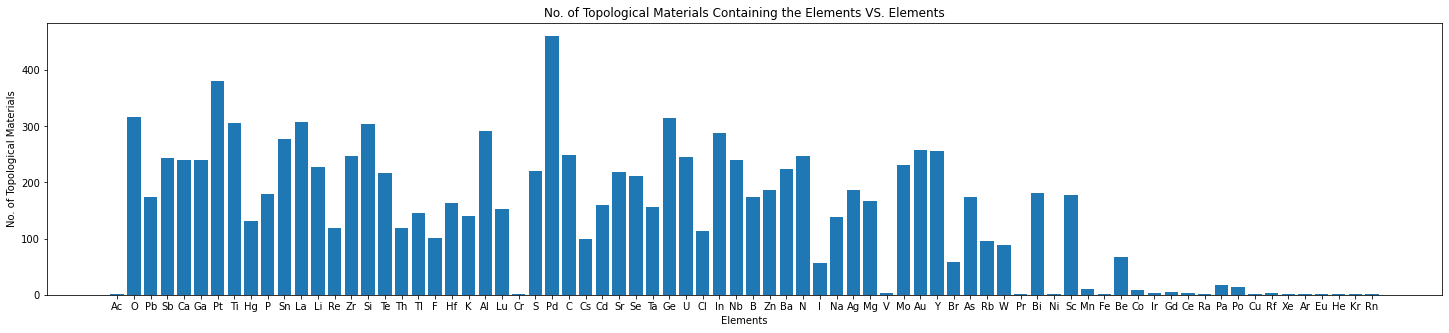

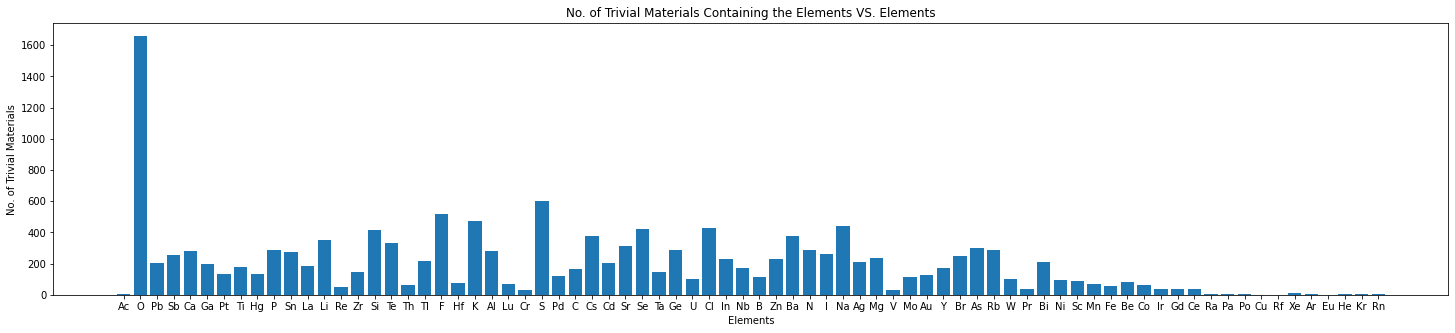

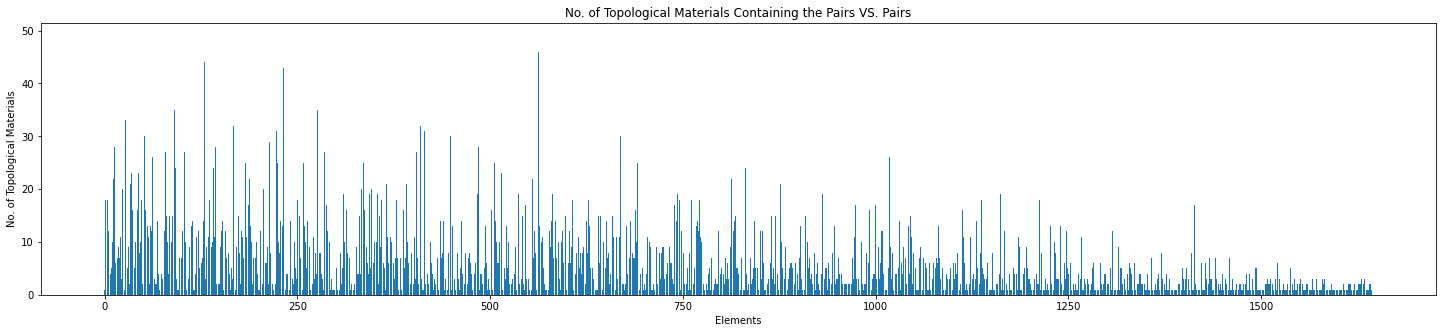

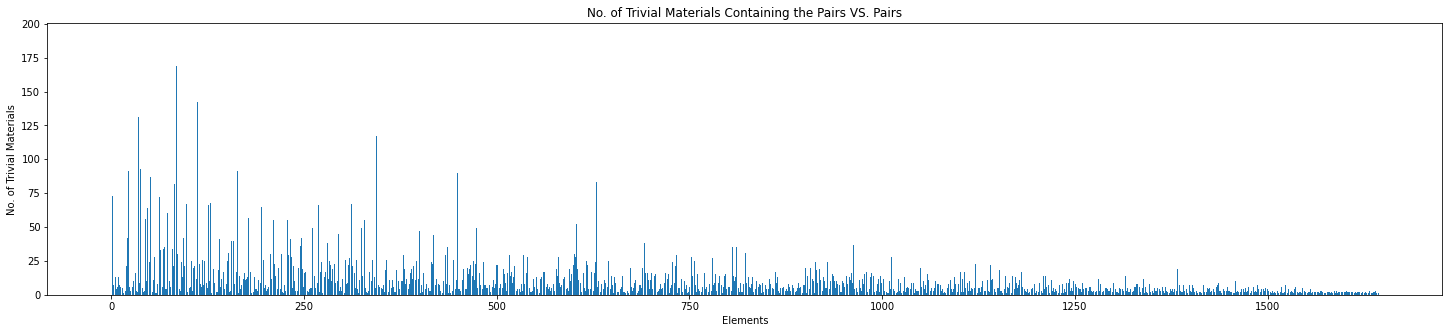

In [27]:
# Making ML dataset for only Space Datasets
# For getting Laplace Smoothed Counts for all elements
trivial_count = {}
topological_count = {}

# For getting Laplace Smoothed Counts for pairs of elements present in the dataset
topological_pairs_count = {}
trivial_pairs_count = {}

with open('space_datasets\\training_space.csv', 'r', newline='') as f:
    r = csv.reader(f)
    for i in r:
        comp = Composition(i[1]).get_el_amt_dict()
        for j in comp.keys():
            if j not in topological_count: topological_count[j] = 1
            if j not in trivial_count: trivial_count[j] = 1
            if i[2] == '1': topological_count[j] += 1
            else: trivial_count[j] += 1

        for j in get_pairs(i[1]):
            if j not in topological_pairs_count: topological_pairs_count[j] = 1
            if j not in trivial_pairs_count: trivial_pairs_count[j] = 1
            if i[2] == '1': topological_pairs_count[j] += 1
            else: trivial_pairs_count[j] += 1

# Plotting bar plots of counts
elements = list(topological_count.keys())
ele_topological_values = [topological_count[i] for i in elements]
ele_trivial_values = [trivial_count[i] for i in elements]

pairs = list(topological_pairs_count.keys())
pairs_topological_values = [topological_pairs_count[i] for i in pairs]
pairs_trivial_values = [trivial_pairs_count[i] for i in pairs]

plt.figure(figsize=(25, 5))
plt.bar(elements, ele_topological_values)
plt.title('No. of Topological Materials Containing the Elements VS. Elements')
plt.xlabel('Elements')
plt.ylabel('No. of Topological Materials')

plt.figure(figsize=(25, 5))
plt.bar(elements, ele_trivial_values)
plt.title('No. of Trivial Materials Containing the Elements VS. Elements')
plt.xlabel('Elements')
plt.ylabel('No. of Trivial Materials')

for_plotting_pairs = [i for i in range(len(pairs))]
plt.figure(figsize=(25, 5))
plt.bar(for_plotting_pairs, pairs_topological_values)
plt.title('No. of Topological Materials Containing the Pairs VS. Pairs')
plt.xlabel('Elements')
plt.ylabel('No. of Topological Materials')

plt.figure(figsize=(25, 5))
plt.bar(for_plotting_pairs, pairs_trivial_values)
plt.title('No. of Trivial Materials Containing the Pairs VS. Pairs')
plt.xlabel('Elements')
plt.ylabel('No. of Trivial Materials')

In [28]:
print('Total number of elements present in dataset =', len(elements))
print('Total number of pairs of elements present in dataset =', len(pairs))

Total number of elements present in dataset = 76
Total number of pairs of elements present in dataset = 1645


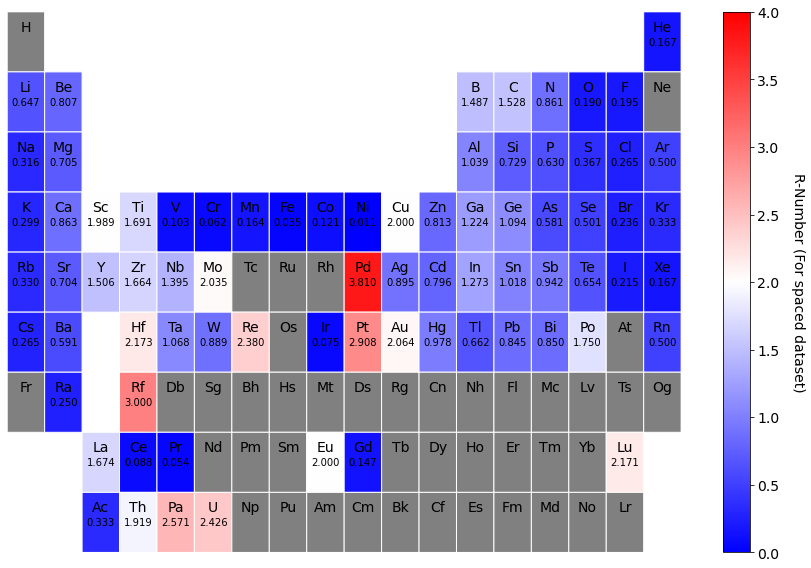

In [29]:
# Generating the ratio of probabilities for each element and pair
r_number_for_element = {}
for i in elements:
    r_number_for_element[i] = topological_count[i] / trivial_count[i]

r_number_for_pair = {}
for i in pairs:
    r_number_for_pair[i] = topological_pairs_count[i] / trivial_pairs_count[i]

# Writing R-Number values
with open('results\\r_number_values\\space_dataset_values\\element_r_number_space_dataset.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for i in r_number_for_element.keys():
        w.writerow([i, r_number_for_element[i]])
with open('results\\r_number_values\\space_dataset_values\\pair_r_number_space_dataset.csv', 'w', newline='') as f:
    w = csv.writer(f)
    for i in r_number_for_pair.keys():
        w.writerow([i, r_number_for_pair[i]])

# Generating heatmaps
l = int(min(r_number_for_element.values())) # Lower value for Heatmap
h = int(max(r_number_for_element.values()))    # Higher value for Heatmap
if (max(r_number_for_element.values()) - int(max(r_number_for_element.values()))) < 0.5: h += 0.5
else: h += 1

periodic_table_heatmap(r_number_for_element, cbar_label="R-Number (For spaced dataset)", show_plot=True, cmap="bwr", cmap_range=(l,h), value_format='%.3f', pymatviz=False)

# Making final training ML dataset to run ML algorithm
with open('space_datasets\\training_space_ml_dataset.csv', 'w', newline='') as fw:
    w = csv.writer(fw)
    with open('space_datasets\\training_space.csv', 'r') as fr:
        r = csv.reader(fr)
        for i in r:
            calculated_from_ele = 0
            calculated_from_reciprocal = 0
            calculated_from_pair = 0
            calculated_from_pair_reciprocal = 0
            comp = Composition(i[1]).fractional_composition.get_el_amt_dict()

            for j in comp.keys():
                calculated_from_ele += r_number_for_element[j] * comp[j]
                calculated_from_reciprocal += (1 / r_number_for_element[j]) * comp[j]
            
            for j in get_pairs(i[1]):
                frac_composition_of_pair = 0
                for _ in j: frac_composition_of_pair += comp[_]
                calculated_from_pair += r_number_for_pair[j] * frac_composition_of_pair
                calculated_from_pair_reciprocal += (1 / r_number_for_pair[j]) * frac_composition_of_pair
            
            w.writerow([i[0], i[1], calculated_from_ele, calculated_from_pair, calculated_from_reciprocal, calculated_from_pair_reciprocal, i[2]])

# Making final discovery ML dataset for prediction
with open('space_datasets\\discovery_space_prediction_dataset.csv', 'w', newline='') as fw:
    w = csv.writer(fw)
    with open('space_datasets\\discovery_space.csv', 'r') as fr:
        r = csv.reader(fr)
        for i in r:
            calculated_from_ele = 0
            calculated_from_reciprocal = 0
            calculated_from_pair = 0
            calculated_from_pair_reciprocal = 0
            comp = Composition(i[1]).fractional_composition.get_el_amt_dict()

            for j in comp.keys():
                calculated_from_ele += r_number_for_element[j] * comp[j]
                calculated_from_reciprocal += (1 / r_number_for_element[j]) * comp[j]
            
            for j in get_pairs(i[1]):
                frac_composition_of_pair = 0
                for _ in j: frac_composition_of_pair += comp[_]
                try:
                    calculated_from_pair += r_number_for_pair[j] * frac_composition_of_pair
                    calculated_from_pair_reciprocal += (1 / r_number_for_pair[j]) * frac_composition_of_pair
                except: pass    # For pairs in discovery space not present in training space
            
            w.writerow([i[0], i[1], calculated_from_ele, calculated_from_pair, calculated_from_reciprocal, calculated_from_pair_reciprocal, i[2]])

In [2]:
# Sorting the R-Number values saved in file for easier retrieval

files = []
for i in ['complete', 'space', 'topogivity']:
    files.append('results\\r_number_values\\'+i+'_dataset_values\\element_r_number_'+i+'_dataset.csv')
    files.append('results\\r_number_values\\'+i+'_dataset_values\\pair_r_number_'+i+'_dataset.csv')

for i in files:
    l = []
    with open(i, 'r') as f:
        r = csv.reader(f)
        for j in r:
            l.append([j[0].replace("'", '').replace('"', ''), j[1]])
        
    l.sort()

    with open(i, 'w', newline='') as f:
        w = csv.writer(f)
        for j in l:
            w.writerow(j)

print('Sorted and wrote all files! Done!')

Sorted and wrote all files! Done!
